In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
# Load & prep
df = pd.read_csv('../OLX_cars_dataset00.csv')

# Identify top 6 brands by count and filter down
top_brands = df['Make'].value_counts().nlargest(6).index

df_top = df[df['Make'].isin(top_brands)]

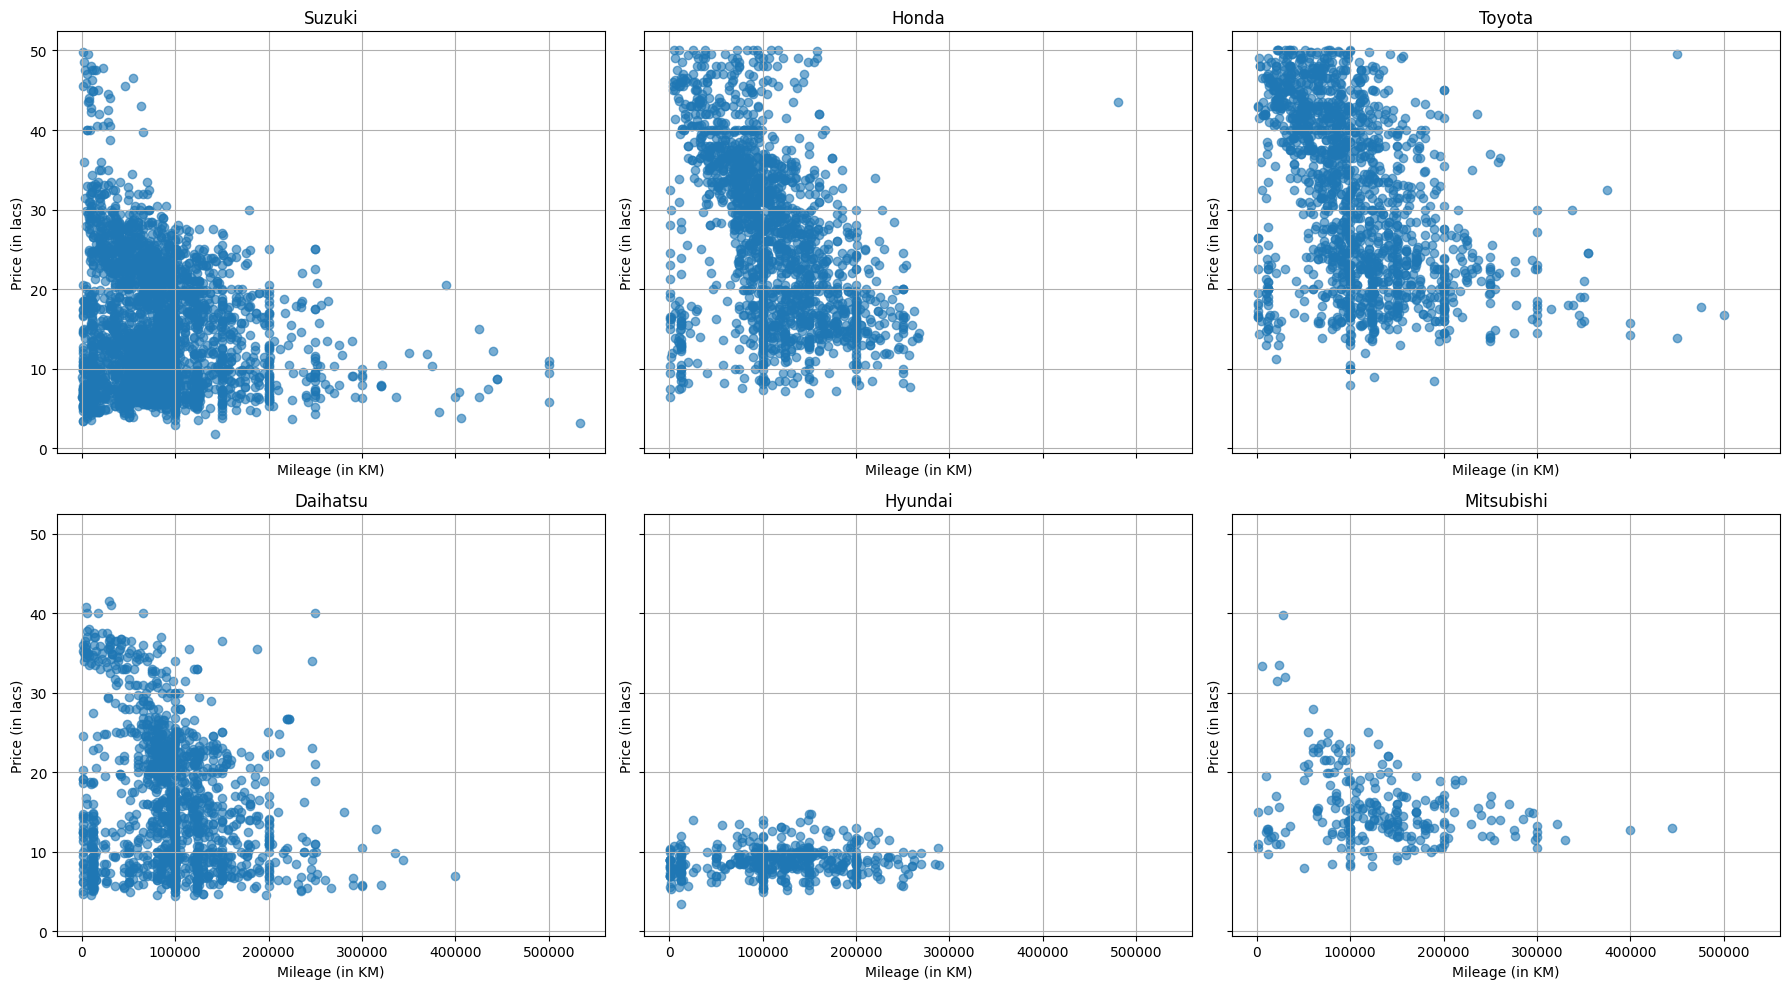

In [5]:
# Setup subplots
cols = 3
rows = 2
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows), sharex=True, sharey=True)
axes = axes.flatten()

for ax, make in zip(axes, top_brands):
    subset = df_top[df_top['Make'] == make]
    X = subset["KM's driven"]
    y = subset['Price']
    
    ax.scatter(X, y, alpha=0.6)
    ax.set_title(make)
    ax.set_xlabel("Mileage (in KM)")
    ax.set_ylabel("Price (in lacs)")
    
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x/1e5:.0f}"))
    ax.yaxis.set_major_locator(ticker.AutoLocator())
    ax.grid(True)

# hide any extra axes
for ax in axes[len(top_brands):]:
    ax.set_visible(False)

fig.tight_layout()
plt.show()


In [6]:
# Get the unique transmission types
trans_types = df['Transmission'].unique()

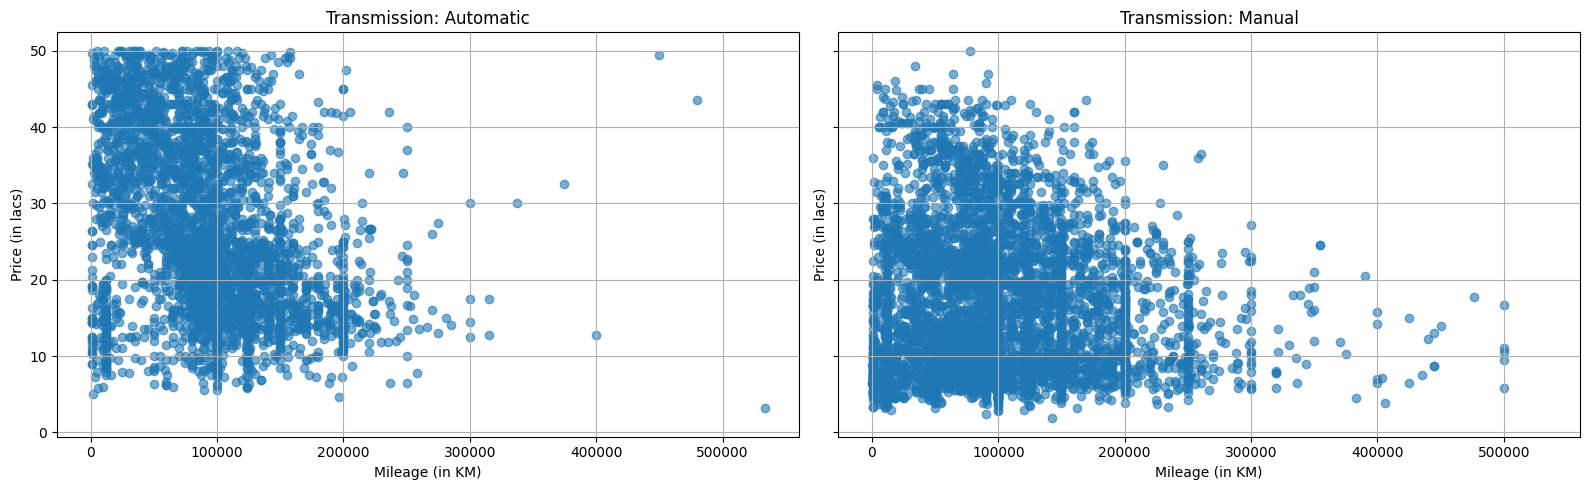

In [63]:
# 2. Make a subplot for Manual & Automatic
n = len(trans_types)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(8 * cols, 5 * rows), sharex=True, sharey=True)
axes = axes.flatten()

for ax, t in zip(axes, trans_types):
    subset = df[df['Transmission'] == t]
    X = subset["KM's driven"]
    y = subset['Price']
    
    ax.scatter(X, y, alpha=0.6)
    ax.set_title(f"Transmission: {t}")
    ax.set_xlabel("Mileage (in KM)")
    ax.set_ylabel("Price (in lacs)")
    
    # re-use your lakh formatter
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x/1e5:.0f}"))
    ax.yaxis.set_major_locator(ticker.AutoLocator())
    ax.grid(True)

# hide any empty subplots
for ax in axes[len(trans_types):]:
    ax.set_visible(False)

fig.tight_layout()
plt.show()
